In [1]:
#import necessary lib.
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

2024-05-03 00:23:30.064554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 00:23:30.496890: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 00:23:30.631440: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-03 00:23:30.631465: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
pwd

'/home/amlan/Desktop/OneDrive/major project/Multi Cancer'

In [3]:
# paths to the training and testing directories
train_data_dir = '/home/amlan/Desktop/OneDrive/major project/Multi Cancer/Traning'
test_data_dir = '/home/amlan/Desktop/OneDrive/major project/Multi Cancer/Testing'

In [4]:
#height and width
img_width, img_height = 128, 128

In [5]:
#no of classes
num_classes = 8

In [6]:
# Number of training and testing samples
num_train_samples = 79010
num_test_samples = 50992

In [7]:
# Set up data augmentation for training data
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [8]:
# Set up data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1/255)

In [9]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),batch_size=32,class_mode='categorical')

Found 79010 images belonging to 8 classes.


In [10]:
# Load test data without augmentation
test_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(img_width, img_height),batch_size=32,class_mode='categorical',shuffle=False)

Found 50992 images belonging to 8 classes.


In [11]:
#build the cnn model architechure
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


2024-05-03 00:23:35.862971: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-03 00:23:35.863218: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-03 00:23:35.863243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (amnand): /proc/driver/nvidia/version does not exist
2024-05-03 00:23:35.867639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#train the model
history = model.fit(train_generator,steps_per_epoch=num_train_samples // 32,epochs=10)

Epoch 1/10
2469/2469 [==============================] - 551s 223ms/step - loss: 0.0442 - accuracy: 0.9308
Epoch 2/10
2469/2469 [==============================] - 543s 220ms/step - loss: 0.0147 - accuracy: 0.9809
Epoch 3/10
2469/2469 [==============================] - 538s 218ms/step - loss: 0.0110 - accuracy: 0.9867
Epoch 4/10
2469/2469 [==============================] - 536s 217ms/step - loss: 0.0082 - accuracy: 0.9898
Epoch 5/10
2469/2469 [==============================] - 538s 218ms/step - loss: 0.0079 - accuracy: 0.9911
Epoch 6/10
2469/2469 [==============================] - 533s 216ms/step - loss: 0.0050 - accuracy: 0.9940
Epoch 7/10
2469/2469 [==============================] - 533s 216ms/step - loss: 0.0050 - accuracy: 0.9938
Epoch 8/10
2469/2469 [==============================] - 537s 217ms/step - loss: 0.0059 - accuracy: 0.9935
Epoch 9/10
2469/2469 [==============================] - 546s 221ms/step - loss: 0.0049 - accuracy: 0.9942
Epoch 10/10
2469/2469 [=======================

In [14]:
import pandas as pd
history_df = pd.DataFrame(history.history)

In [15]:
#evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_generator,steps=num_test_samples // 32)
print("Train loss:", loss)
print("Train accuracy:",accuracy)

1593/1593 [==============================] - 135s 84ms/step - loss: 0.0030 - accuracy: 0.9964
Train loss: 0.0030206460505723953
Train accuracy: 0.9963708519935608


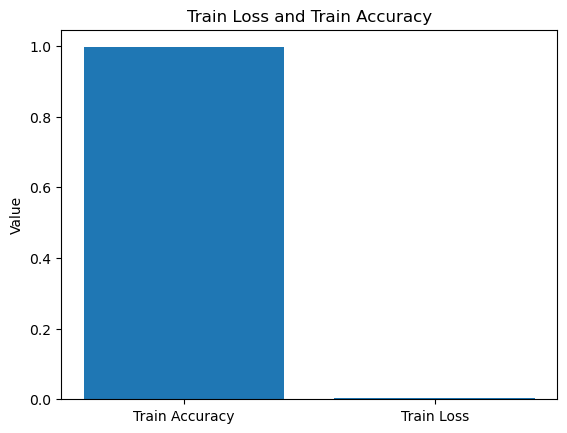

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot testing accuracy and loss
plt.bar(['Train Accuracy', 'Train Loss'], [accuracy, loss])
plt.title('Train Loss and Train Accuracy')
plt.ylabel('Value')
plt.show()

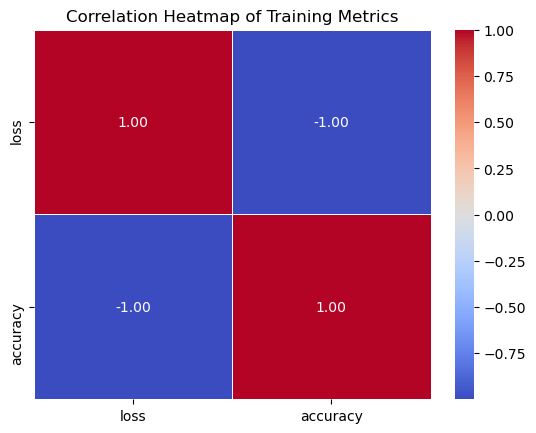

In [17]:
#plt.figure(figuresize=(10, 6))
sns.heatmap(history_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Correlation Heatmap of Training Metrics')
plt.show()

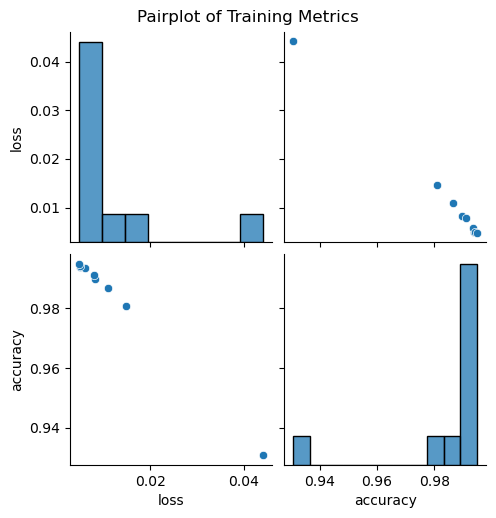

In [18]:
sns.pairplot(history_df)
plt.suptitle('Pairplot of Training Metrics', y=1.02)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [20]:
img = cv2.imread(r"/home/amlan/Desktop/OneDrive/major project/Multi Cancer/Traning/Lung and Colon Cancer/lung_aca/lung_aca_2038.jpg")
img = cv2.resize(img,(128,128))
img_array = np.array(img)
img_array.shape

(128, 128, 3)

In [21]:
img_array = img_array.reshape(1,128,128,3)
img_array.shape

(1, 128, 128, 3)

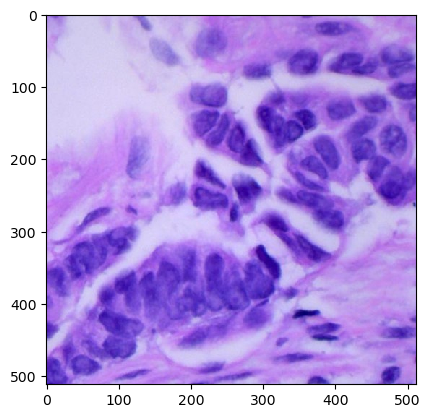

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"/home/amlan/Desktop/OneDrive/major project/Multi Cancer/Traning/Lung and Colon Cancer/lung_aca/lung_aca_2038.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
a = model.predict(img_array)
indices = a.argmax()
indices
 # Write names based on predicted class
if indices == 0:
    name = 'ALL'
elif indices == 1:
    name = 'Brain Cancer'
elif indices == 2:
    name = 'Breast Cancer'
elif indices == 3:
    name = 'Cervical Cancer'
elif indices == 4:
    name = 'Kidney Cancer'
elif indices == 5:
    name = 'Lung and Colon Cancer'
elif indices == 6:
    name = 'Lymphoma'
elif indices == 7:
    name = 'Oral Cancer'
else:
        name = 'unknown'
print(name)

1/1 [==============================] - 0s 102ms/step
Lung and Colon Cancer


1594/1594 [==============================] - 133s 83ms/step


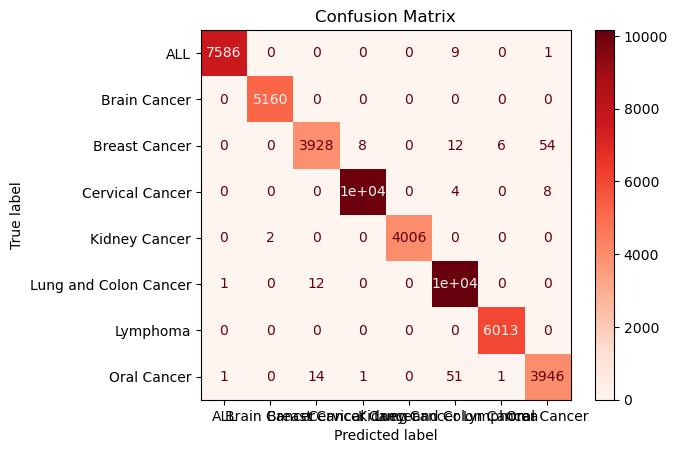

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict probabilities for the test data
y_pred_prob = model.predict(test_generator)

# Predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# True class labels
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
labels = ['ALL', 'Brain Cancer', 'Breast Cancer', 'Cervical Cancer', 'Kidney Cancer', 'Lung and Colon Cancer', 'Lymphoma', 'Oral Cancer']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()
